In [1]:
!pip install transformers
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 7.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/teknofest_train_final.csv", sep="|")

In [4]:
df=df.set_index("id")[["text","is_offensive"]]

In [5]:
df.columns=["text","labels"]
df.labels=pd.Categorical(df.labels)

In [6]:
from sklearn.model_selection import train_test_split

train_df, eval_df = train_test_split(df, stratify=df.labels
                 )

In [7]:
from simpletransformers.classification import ClassificationModel
import torch,sklearn

model_args = {
    "use_early_stopping": True,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "early_stopping_patience": 5,
    "evaluate_during_training_steps": 1000,
    "fp16": False,
    "num_train_epochs":3
}

model = ClassificationModel(
    "bert", 
    "dbmdz/bert-base-turkish-cased",
     use_cuda=True, 
     args=model_args, 
     num_labels=2
)
model.train_model(train_df, acc=sklearn.metrics.f1_score)

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 

  0%|          | 0/9462 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1183 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/1183 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1183 [00:00<?, ?it/s]

(3549, 0.11297322790940464)

In [12]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

  0%|          | 0/3155 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/395 [00:00<?, ?it/s]

In [16]:
eval_df["preds"] = model_outputs.argmax(axis=1)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(eval_df.labels, eval_df.preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       900
           1       0.97      0.98      0.98      2255

    accuracy                           0.97      3155
   macro avg       0.97      0.96      0.96      3155
weighted avg       0.97      0.97      0.97      3155



In [24]:
 def get_report(test, preds):
    print(classification_report(test, preds))
    cm = confusion_matrix(test, preds)
    plt.figure(figsize=(4, 4))
    sns.heatmap(
        cm, annot=True, fmt=".0f", cmap="Blues", cbar=False, annot_kws={"size": 12}
    )
    plt.ylabel("True Label", size=12)
    plt.xlabel("Prediction", size=12)
    plt.show()

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       900
           1       0.97      0.98      0.98      2255

    accuracy                           0.97      3155
   macro avg       0.97      0.96      0.96      3155
weighted avg       0.97      0.97      0.97      3155



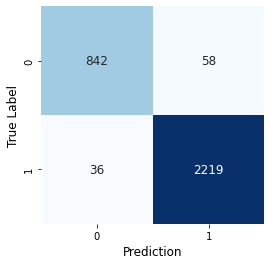

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
get_report(eval_df.labels, eval_df.preds)